## **DEMANDA Y TEMPERATURA:** POR ESTACIONES

#### **1) Importamos libreria útiles:**

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set(style="darkgrid")
maxScatter = 3000

#### **2) Cargamos datos:**

- Comprobamos que trabajamos en el directorio correcto y cargamos datos de carpeta "data":

In [12]:
dir = os.getcwd()
DIR = dir
print('Current working directory:', os.getcwd())


# Nos guardamos los datos que queremos en un dataframe usando pandas
dataframe = pd.read_csv('..\data\G02_DATOS_DEM_G1.csv', sep=',', verbose=True)
dataframe['FECHA'] = pd.to_datetime(dataframe['FECHA'], format='%d/%m/%Y')
dataframe

Current working directory: c:\Users\serov\Documents\GitHub\TRABAJO-1-ESTADISTICA-DESCRIPTIVA\notebooks
Tokenization took: 3.00 ms
Type conversion took: 2.00 ms
Parser memory cleanup took: 0.00 ms


,FECHA,DEM,TMAX,TMIN,FEST,ANNO,MES,DIA,DIASEM
0,2014-01-01,695.150000,14.500000,4.900000,1,2014,1,1,4
1,2014-01-02,848.520000,17.900000,8.300000,0,2014,1,2,5
2,2014-01-03,842.250000,18.000000,10.800000,0,2014,1,3,6
3,2014-01-04,790.870000,14.800000,9.900000,0,2014,1,4,7
4,2014-01-05,765.880000,15.500000,8.300000,0,2014,1,5,1
...,...,...,...,...,...,...,...,...,...
2950,2022-01-29,897.963540,14.928054,7.128469,0,2022,1,29,7
2951,2022-01-30,883.656025,14.921389,7.131950,0,2022,1,30,1
2952,2022-01-31,1016.937007,14.914723,7.135431,0,2022,1,31,2
2953,2022-02-01,1014.929731,14.908058,7.138912,0,2022,2,1,3


- En este notebook queremos estudiar las distintas estaciones, por tanto haremos 4 dataframes (uno por cada estación):

In [13]:
def getMonths(input, m1, m2, m3):
    return input.loc[(input['FECHA'].dt.month==m1) | (input['FECHA'].dt.month==m2) | (input['FECHA'].dt.month==m3)]

dataframe_invierno = getMonths(dataframe, 12, 1, 2)
dataframe_primavera = getMonths(dataframe, 3, 4, 5)
dataframe_verano = getMonths(dataframe, 6, 7, 8)
dataframe_otoño = getMonths(dataframe, 9, 10, 11)

In [14]:
dataframe_invierno.describe()

,FECHA,DEM,TMAX,TMIN,FEST,ANNO,MES,DIA,DIASEM
0,2014-01-01,695.150000,14.500000,4.900000,1,2014,1,1,4
1,2014-01-02,848.520000,17.900000,8.300000,0,2014,1,2,5
2,2014-01-03,842.250000,18.000000,10.800000,0,2014,1,3,6
3,2014-01-04,790.870000,14.800000,9.900000,0,2014,1,4,7
4,2014-01-05,765.880000,15.500000,8.300000,0,2014,1,5,1
...,...,...,...,...,...,...,...,...,...
2950,2022-01-29,897.963540,14.928054,7.128469,0,2022,1,29,7
2951,2022-01-30,883.656025,14.921389,7.131950,0,2022,1,30,1
2952,2022-01-31,1016.937007,14.914723,7.135431,0,2022,1,31,2
2953,2022-02-01,1014.929731,14.908058,7.138912,0,2022,2,1,3


In [15]:
dataframe_primavera.describe()

,FECHA,DEM,TMAX,TMIN,FEST,ANNO,MES,DIA,DIASEM
59,2014-03-01,791.870000,14.8,7.0,0,2014,3,1,7
60,2014-03-02,702.940000,15.1,7.0,0,2014,3,2,1
61,2014-03-03,865.390000,16.7,10.3,0,2014,3,3,2
62,2014-03-04,900.810000,17.3,8.3,0,2014,3,4,3
63,2014-03-05,848.630000,15.5,8.7,0,2014,3,5,4
...,...,...,...,...,...,...,...,...,...
2703,2021-05-27,729.298791,22.5,15.5,0,2021,5,27,5
2704,2021-05-28,709.777328,24.1,16.0,0,2021,5,28,6
2705,2021-05-29,609.357053,24.8,15.4,0,2021,5,29,7
2706,2021-05-30,602.218755,24.9,19.5,0,2021,5,30,1


In [16]:
dataframe_verano.describe()

,FECHA,DEM,TMAX,TMIN,FEST,ANNO,MES,DIA,DIASEM
151,2014-06-01,519.100000,22.9,14.3,0,2014,6,1,1
152,2014-06-02,643.240000,23.4,16.9,0,2014,6,2,2
153,2014-06-03,646.980000,22.3,17.7,0,2014,6,3,3
154,2014-06-04,654.490000,24.0,17.0,0,2014,6,4,4
155,2014-06-05,641.230000,23.0,16.0,0,2014,6,5,5
...,...,...,...,...,...,...,...,...,...
2795,2021-08-27,647.330082,29.9,23.7,0,2021,8,27,6
2796,2021-08-28,569.430591,27.2,22.6,0,2021,8,28,7
2797,2021-08-29,573.972010,27.3,22.4,0,2021,8,29,1
2798,2021-08-30,683.820534,25.0,20.9,0,2021,8,30,2


In [17]:
dataframe_otoño.describe()

,FECHA,DEM,TMAX,TMIN,FEST,ANNO,MES,DIA,DIASEM
243,2014-09-01,589.990000,27.0,22.0,0,2014,9,1,2
244,2014-09-02,606.150000,27.3,22.0,0,2014,9,2,3
245,2014-09-03,621.150000,25.8,22.0,0,2014,9,3,4
246,2014-09-04,628.870000,26.0,22.0,0,2014,9,4,5
247,2014-09-05,602.550000,27.3,22.0,0,2014,9,5,6
...,...,...,...,...,...,...,...,...,...
2886,2021-11-26,1033.049143,14.9,6.7,0,2021,11,26,6
2887,2021-11-27,945.319671,14.8,5.6,0,2021,11,27,7
2888,2021-11-28,963.553343,11.9,5.4,0,2021,11,28,1
2889,2021-11-29,1064.937445,14.9,4.9,0,2021,11,29,2


#### **3) Graficamos:**

- Demandas por año:

<function matplotlib.pyplot.show(close=None, block=None)>

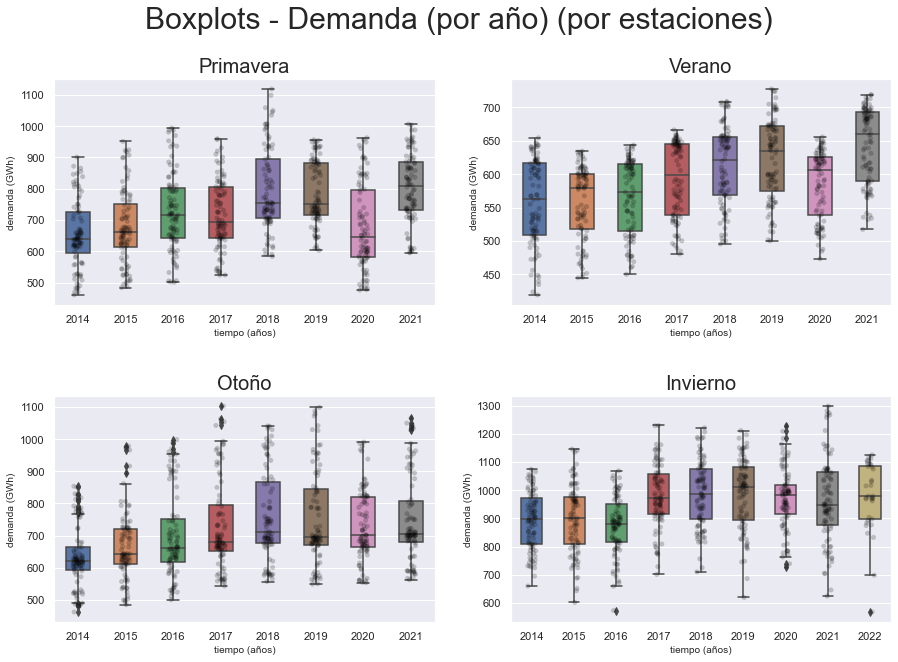

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15,10))

# Ajustamos el espaciado
fig.subplots_adjust(wspace = 0.2, hspace = 0.4)

# Primavera
DEM_boxplot = sns.boxplot(y='DEM', x='ANNO', 
                 data=dataframe_primavera, 
                 width=0.5,
                 ax=ax1)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='DEM', x='ANNO', 
                       data=dataframe_primavera, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax1)

# Verano
DEM_boxplot = sns.boxplot(y='DEM', x='ANNO', 
                 data=dataframe_verano, 
                 width=0.5,
                 ax=ax2)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='DEM', x='ANNO', 
                       data=dataframe_verano, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax2)

# Otoño
DEM_boxplot = sns.boxplot(y='DEM', x='ANNO', 
                 data=dataframe_otoño, 
                 width=0.5,
                 ax=ax3)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='DEM', x='ANNO', 
                       data=dataframe_otoño, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax3)

# Invierno
DEM_boxplot = sns.boxplot(y='DEM', x='ANNO', 
                 data=dataframe_invierno, 
                 width=0.5,
                 ax=ax4)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='DEM', x='ANNO', 
                       data=dataframe_invierno, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax4)

plt.suptitle('Boxplots - Demanda (por año) (por estaciones)', fontsize = 30)
ax1.set_title('Primavera', fontsize = 20)
ax2.set_title('Verano', fontsize = 20)
ax3.set_title('Otoño', fontsize = 20)
ax4.set_title('Invierno', fontsize = 20)

ax1.set_xlabel("tiempo (años)", fontsize = 10)
ax1.set_ylabel("demanda (GWh)", fontsize = 10)

ax2.set_xlabel("tiempo (años)", fontsize = 10)
ax2.set_ylabel("demanda (GWh)", fontsize = 10)

ax3.set_xlabel("tiempo (años)", fontsize = 10)
ax3.set_ylabel("demanda (GWh)", fontsize = 10)

ax4.set_xlabel("tiempo (años)", fontsize = 10)
ax4.set_ylabel("demanda (GWh)", fontsize = 10)

plt.savefig('../reports/figures/Boxplots - Demanda (por año) (por estaciones).png', bbox_inches='tight')
plt.show

- Temperaturas máximas por año:

<function matplotlib.pyplot.show(close=None, block=None)>

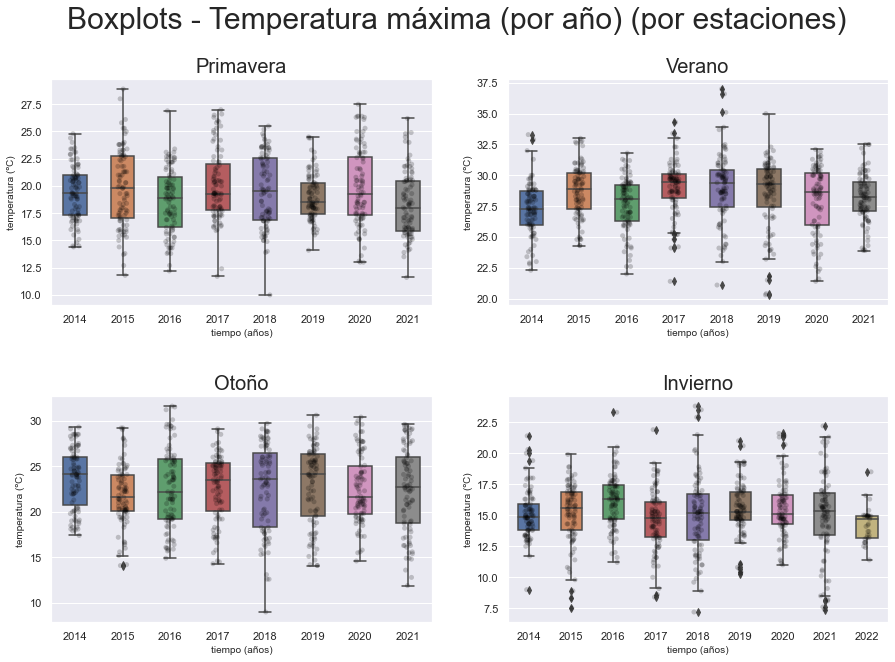

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15,10))

# Ajustamos el espaciado
fig.subplots_adjust(wspace = 0.2, hspace = 0.4)

# Primavera
DEM_boxplot = sns.boxplot(y='TMAX', x='ANNO', 
                 data=dataframe_primavera, 
                 width=0.5,
                 ax=ax1)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='TMAX', x='ANNO', 
                       data=dataframe_primavera, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax1)

# Verano
DEM_boxplot = sns.boxplot(y='TMAX', x='ANNO', 
                 data=dataframe_verano, 
                 width=0.5,
                 ax=ax2)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='TMAX', x='ANNO', 
                       data=dataframe_verano, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax2)

# Otoño
DEM_boxplot = sns.boxplot(y='TMAX', x='ANNO', 
                 data=dataframe_otoño, 
                 width=0.5,
                 ax=ax3)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='TMAX', x='ANNO', 
                       data=dataframe_otoño, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax3)

# Invierno
DEM_boxplot = sns.boxplot(y='TMAX', x='ANNO', 
                 data=dataframe_invierno, 
                 width=0.5,
                 ax=ax4)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='TMAX', x='ANNO', 
                       data=dataframe_invierno, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax4)

plt.suptitle('Boxplots - Temperatura máxima (por año) (por estaciones)', fontsize = 30)
ax1.set_title('Primavera', fontsize = 20)
ax2.set_title('Verano', fontsize = 20)
ax3.set_title('Otoño', fontsize = 20)
ax4.set_title('Invierno', fontsize = 20)

ax1.set_xlabel("tiempo (años)", fontsize = 10)
ax1.set_ylabel("temperatura (ºC)", fontsize = 10)

ax2.set_xlabel("tiempo (años)", fontsize = 10)
ax2.set_ylabel("temperatura (ºC)", fontsize = 10)

ax3.set_xlabel("tiempo (años)", fontsize = 10)
ax3.set_ylabel("temperatura (ºC)", fontsize = 10)

ax4.set_xlabel("tiempo (años)", fontsize = 10)
ax4.set_ylabel("temperatura (ºC)", fontsize = 10)

plt.savefig('../reports/figures/Boxplots - Temperatura máxima (por año) (por estaciones).png', bbox_inches='tight')
plt.show

- Temperatura mínima por año:

<function matplotlib.pyplot.show(close=None, block=None)>

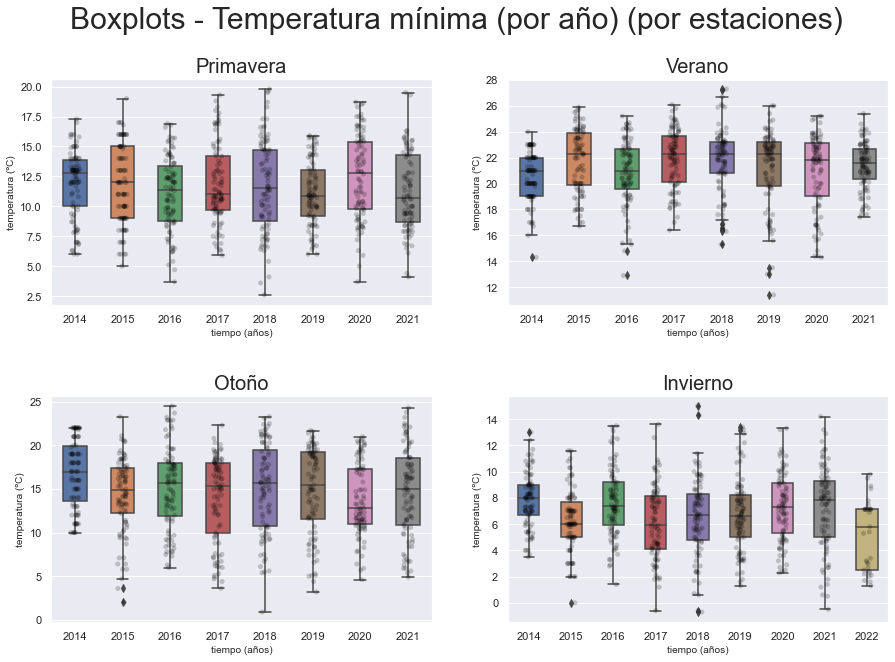

In [20]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15,10))

# Ajustamos el espaciado
fig.subplots_adjust(wspace = 0.2, hspace = 0.4)

# Primavera
DEM_boxplot = sns.boxplot(y='TMIN', x='ANNO', 
                 data=dataframe_primavera, 
                 width=0.5,
                 ax=ax1)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='TMIN', x='ANNO', 
                       data=dataframe_primavera, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax1)

# Verano
DEM_boxplot = sns.boxplot(y='TMIN', x='ANNO', 
                 data=dataframe_verano, 
                 width=0.5,
                 ax=ax2)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='TMIN', x='ANNO', 
                       data=dataframe_verano, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax2)

# Otoño
DEM_boxplot = sns.boxplot(y='TMIN', x='ANNO', 
                 data=dataframe_otoño, 
                 width=0.5,
                 ax=ax3)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='TMIN', x='ANNO', 
                       data=dataframe_otoño, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax3)

# Invierno
DEM_boxplot = sns.boxplot(y='TMIN', x='ANNO', 
                 data=dataframe_invierno, 
                 width=0.5,
                 ax=ax4)

if(len(dataframe) <= maxScatter):
    DEM_boxplot=sns.stripplot(y='TMIN', x='ANNO', 
                       data=dataframe_invierno, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.2,
                       color='black',
                       ax=ax4)

plt.suptitle('Boxplots - Temperatura mínima (por año) (por estaciones)', fontsize = 30)
ax1.set_title('Primavera', fontsize = 20)
ax2.set_title('Verano', fontsize = 20)
ax3.set_title('Otoño', fontsize = 20)
ax4.set_title('Invierno', fontsize = 20)

ax1.set_xlabel("tiempo (años)", fontsize = 10)
ax1.set_ylabel("temperatura (ºC)", fontsize = 10)

ax2.set_xlabel("tiempo (años)", fontsize = 10)
ax2.set_ylabel("temperatura (ºC)", fontsize = 10)

ax3.set_xlabel("tiempo (años)", fontsize = 10)
ax3.set_ylabel("temperatura (ºC)", fontsize = 10)

ax4.set_xlabel("tiempo (años)", fontsize = 10)
ax4.set_ylabel("temperatura (ºC)", fontsize = 10)

plt.savefig('../reports/figures/Boxplots - Temperatura mínima (por año) (por estaciones).png', bbox_inches='tight')
plt.show